In [1]:
import json
import logging
import faster_coco_eval
from faster_coco_eval import COCO
from faster_coco_eval.extra import Curves
from faster_coco_eval.extra import PreviewResults

print(f"{faster_coco_eval.__version__=}")

logging.root.setLevel("INFO")
logging.debug("Запись.")

faster_coco_eval.__version__='1.3.3'


In [2]:
def load(file):
    with open(file) as io:
        _data = json.load(io)
        
    return _data

In [3]:
prepared_coco_in_dict = load('../tests/data/gt_cat_dog.json')
prepared_anns         = load('../tests/data/dt_cat_dog.json')

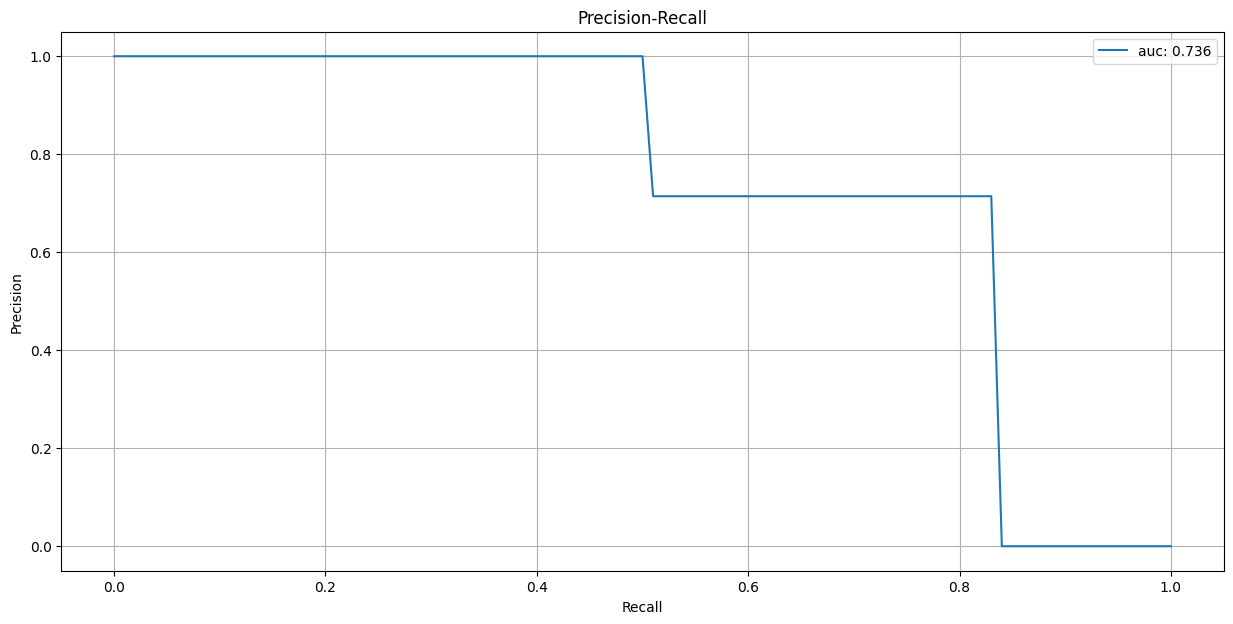

In [4]:
threshold_iou = 0.5
iouType = 'segm'

cocoGt = COCO(prepared_coco_in_dict)
cocoDt = cocoGt.loadRes(prepared_anns)

cur = Curves(cocoGt, cocoDt, iou_tresh=threshold_iou, iouType=iouType)
cur.plot_pre_rec(plotly_backend=False)

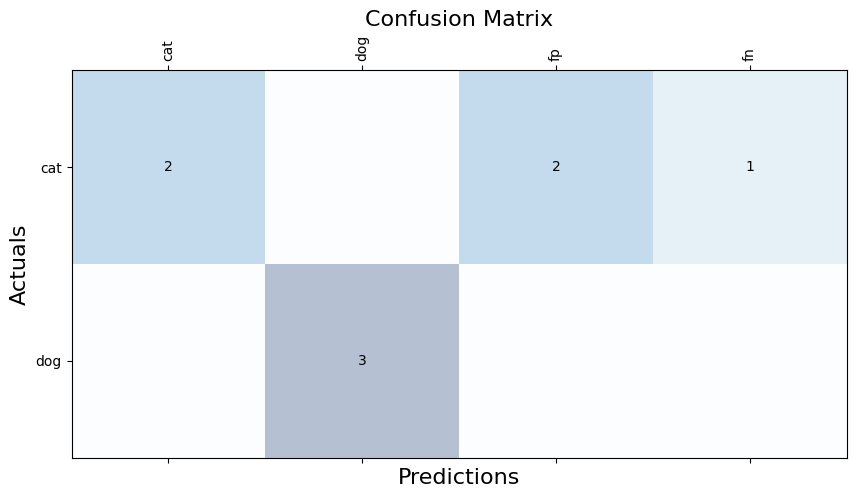

In [5]:
cocoGt = COCO(prepared_coco_in_dict)
cocoDt = cocoGt.loadRes(prepared_anns)

results = PreviewResults(cocoGt, cocoDt, iou_tresh=threshold_iou, iouType=iouType)
results.display_matrix()

Loading default empty image
Loading default empty image
Loading default empty image


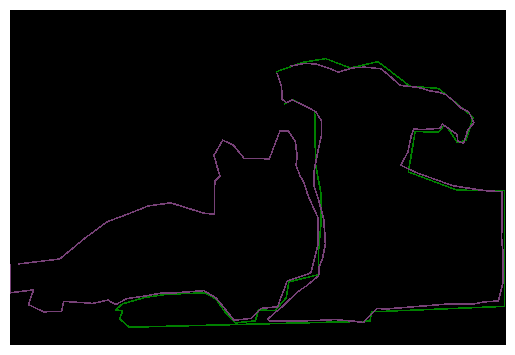

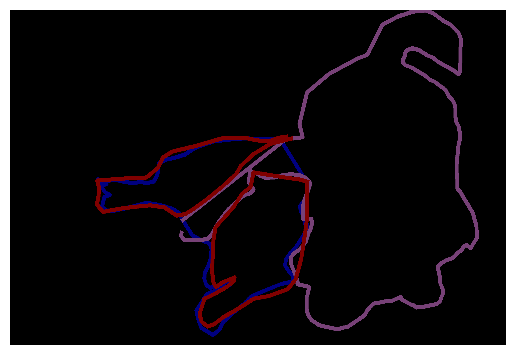

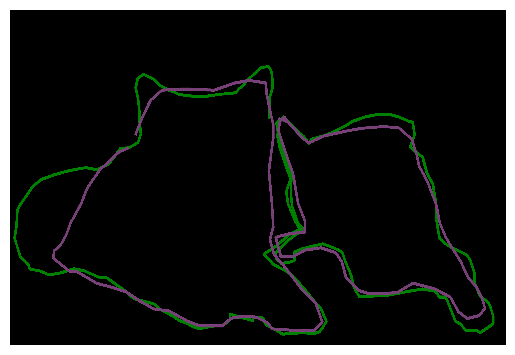

In [6]:
results.display_tp_fp_fn(line_width=20)